In [1]:
import sys
import os
import numpy as np
sys.path.append(os.path.abspath("../../../mathematical_models"))
from mathematical_models.s_on_f import ScalarOnFunctionModel
from datetime import datetime

sys.path.append(os.path.abspath("../../../optimizers"))
from optimizers.cordex_continuous import CordexContinuous

sys.path.append(os.path.abspath("../../basis"))
from basis.bspline import BSplineBasis
from basis.polynomial import PolynomialBasis
from basis.basis import plot_design
from basis.basis import Basis

In [54]:
def f(Gamma, J, beta_true):
    n = Gamma.shape[0]
    epsilon = np.random.normal(0, 0.1, (n, 1))
    return np.array(Gamma @ J @ beta_true + epsilon).reshape(-1,1)

In [65]:
N = 4 # runs
epochs = 100
refinement_epochs = 1
internal_knots_num = 20
beta_true = np.array([1, 1]).reshape(-1, 1)

x_base_1 = BSplineBasis(degree=0, internal_knots_num=internal_knots_num)
b_base_1 = PolynomialBasis(degree=2)
bases_pairs = [(x_base_1, b_base_1)]
x_bases = [x_base_1]

model = ScalarOnFunctionModel(bases_pairs=bases_pairs)
optimizer = CordexContinuous(model=model, runs=N)
best_design, best_objective_value = optimizer.optimize(epochs=epochs, refinement_epochs=refinement_epochs)

100%|██████████| 1/1 [00:00<00:00, 67.05it/s]


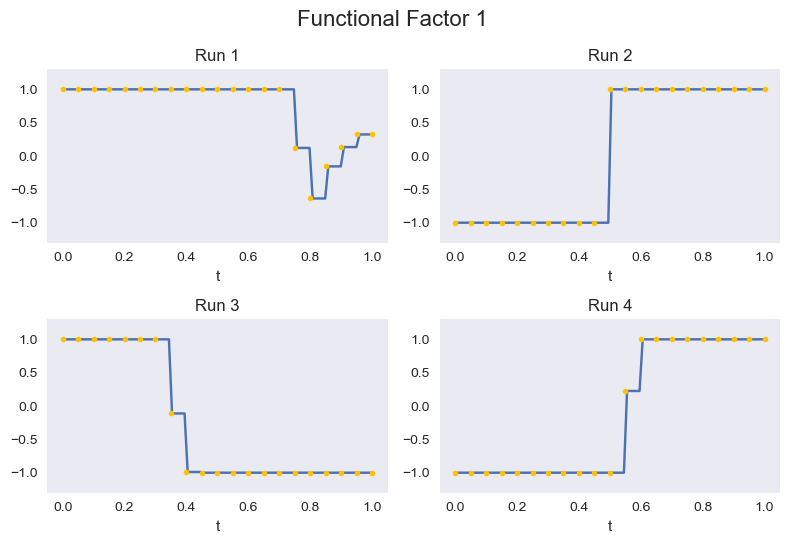

In [66]:
plot_design(best_design, x_bases, N,
            sub_x=2, sub_y=2, colour="#FFC100") # FFC100

In [67]:
y_hat = f(best_design, model.J, beta_true)

In [68]:
Z = best_design @ model.J
beta_hat = np.linalg.inv(Z.T @ Z) @ Z.T @ y_hat
beta_hat

array([[0.71816278],
       [1.48517446]])

In [69]:
beta_true - beta_hat

array([[ 0.28183722],
       [-0.48517446]])

In [72]:
rmse = np.round(np.sqrt(np.mean((beta_true - beta_hat)**2)),3)
rmse

0.397

---

In [79]:
def f(Gamma, J, beta_true):
    n = Gamma.shape[0]
    epsilon = np.random.normal(0, 0.1, (n, 1))
    return np.array(Gamma @ J @ beta_true + epsilon).reshape(-1,1)

N = 4  # Number of runs
epochs = 1_000
refinement_epochs = 100
beta_true = np.array([1, 1]).reshape(-1, 1)

# Lists to store the number of basis functions and RMSE values
num_basis_functions_list = []
rmse_list = []

# Loop over different numbers of internal knots
for internal_knots_num in range(2, 21):  # Internal knots from 1 to 20
    # Create B-spline basis for X with varying internal knots
    x_base_1 = BSplineBasis(degree=0, internal_knots_num=internal_knots_num)
    num_basis_functions = x_base_1.num_basis()
    num_basis_functions_list.append(num_basis_functions)

    # Polynomial basis for beta
    b_base_1 = PolynomialBasis(degree=2)
    bases_pairs = [(x_base_1, b_base_1)]

    # Initialize the model and optimizer
    model = ScalarOnFunctionModel(bases_pairs=bases_pairs)
    optimizer = CordexContinuous(model=model, runs=N)

    # Optimize to find the best design
    best_design, best_objective_value = optimizer.optimize(
        epochs=epochs, refinement_epochs=refinement_epochs
    )

    # Generate observed data using the best design
    y_hat = f(best_design, model.J, beta_true)
    Z = best_design @ model.J

    # Estimate beta using least squares
    beta_hat = np.linalg.inv(Z.T @ Z) @ Z.T @ y_hat

    # Compute RMSE and store it
    rmse = np.round(np.sqrt(np.mean((beta_true - beta_hat)**2)), 3)
    rmse_list.append(rmse)

 68%|██████▊   | 677/1000 [18:50<08:59,  1.67s/it]


KeyboardInterrupt: 

In [80]:
num_basis_functions_array = np.array(num_basis_functions_list)
rmse_array = np.array(rmse_list)

In [81]:
final_array = np.column_stack((num_basis_functions_array, rmse_array))
final_array

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 19 and the array at index 1 has size 18

In [84]:
rmse_array

array([0.095, 0.092, 0.139, 0.273, 0.1  , 0.177, 0.102, 0.097, 0.156,
       0.146, 0.214, 0.027, 0.413, 0.127, 0.187, 0.306, 0.232, 0.064])

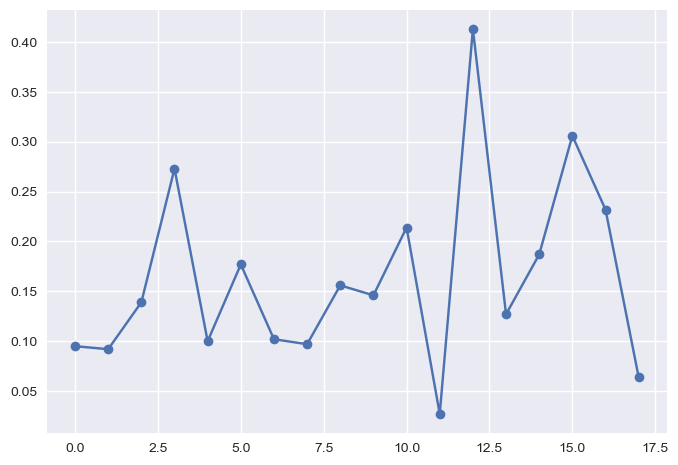

In [85]:
import matplotlib.pyplot as plt
plt.plot(rmse_array, marker="o")
plt.show()